# CV Assignment 3

## Raktim Dey - MDS202132 (34%)
## Rishika Tibrewal - MDS202135 (33%)
## Shreyansh Rastogi - MDS202144 (33%)

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

## Question 1 

In [3]:
# Printing Object Points
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:168:24,0:161:23].T.reshape(-1,2)
print(objp)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3D point in real world space
imgpoints = [] # 2D points in image plane.

[[  0.   0.   0.]
 [ 24.   0.   0.]
 [ 48.   0.   0.]
 [ 72.   0.   0.]
 [ 96.   0.   0.]
 [120.   0.   0.]
 [144.   0.   0.]
 [  0.  23.   0.]
 [ 24.  23.   0.]
 [ 48.  23.   0.]
 [ 72.  23.   0.]
 [ 96.  23.   0.]
 [120.  23.   0.]
 [144.  23.   0.]
 [  0.  46.   0.]
 [ 24.  46.   0.]
 [ 48.  46.   0.]
 [ 72.  46.   0.]
 [ 96.  46.   0.]
 [120.  46.   0.]
 [144.  46.   0.]
 [  0.  69.   0.]
 [ 24.  69.   0.]
 [ 48.  69.   0.]
 [ 72.  69.   0.]
 [ 96.  69.   0.]
 [120.  69.   0.]
 [144.  69.   0.]
 [  0.  92.   0.]
 [ 24.  92.   0.]
 [ 48.  92.   0.]
 [ 72.  92.   0.]
 [ 96.  92.   0.]
 [120.  92.   0.]
 [144.  92.   0.]
 [  0. 115.   0.]
 [ 24. 115.   0.]
 [ 48. 115.   0.]
 [ 72. 115.   0.]
 [ 96. 115.   0.]
 [120. 115.   0.]
 [144. 115.   0.]
 [  0. 138.   0.]
 [ 24. 138.   0.]
 [ 48. 138.   0.]
 [ 72. 138.   0.]
 [ 96. 138.   0.]
 [120. 138.   0.]
 [144. 138.   0.]]


## Question 2

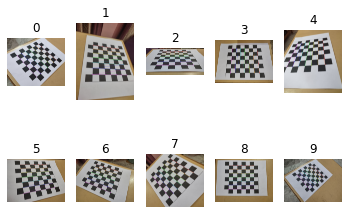

In [4]:
plt.rcParams['figure.figsize'] = (30, 15)


# Reading images
images = [f"img_{i}.jpg" for i in range(1,11)]

# Defining termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

fig, ax = plt.subplots(2,5)
for i in ax.flatten():
    i.axis('off')

for i, f in enumerate(images):
    img = cv2.imread(f) # Capture frame-by-frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,7), None)
    # If corners are found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,7), corners2, ret)
        ax[i//5,i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i//5,i%5].set_title(i)

## Question 3

In [5]:
# calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Rounding off the matrix and distortion coefficients
np.set_printoptions(precision=4, suppress=True)

# Displaying camera matrix and distortion paremeters
print("Intrinsic Camera Matrix:",mtx, sep='\n', end='\n\n')
print("Lens Distortion Parameters:",dist, sep='\n')

Intrinsic Camera Matrix:
[[1059.6437    0.      669.758 ]
 [   0.      992.5535  427.8847]
 [   0.        0.        1.    ]]

Lens Distortion Parameters:
[[ 0.1414 -1.5146  0.003   0.0166  2.557 ]]


## Question 4

In [6]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(np.round((mean_error/len(objpoints)),4)) )

total error: 0.7092


## Question 5

In [7]:
# Setting up Blob Detector for the circles

# Setup SimpleBlobDetector parameters. 
blobParams = cv2.SimpleBlobDetector_Params() 

# Change thresholds 
blobParams.minThreshold = 8 
blobParams.maxThreshold = 255 

# Filter by Area. 
blobParams.filterByArea = True 
blobParams.minArea = 30
blobParams.maxArea = 2500 

# Filter by Circularity
blobParams.filterByCircularity = True 
blobParams.minCircularity = 0.1 

# Filter by Convexity 
blobParams.filterByConvexity = True 
blobParams.minConvexity = 0.87 

# Filter by Inertia 
blobParams.filterByInertia = True 
blobParams.minInertiaRatio = 0.01 
blobParams.minDistBetweenBlobs = 2

# Create a detector with the parameters 
blobDetector = cv2.SimpleBlobDetector_create(blobParams)

# Preparing object points
# The distance between the centres of the blobs is 2.2cm
objp = np.zeros((10*10,3), np.float32)
objp[:,:2] = np.mgrid[0:220:22,0:220:22].T.reshape(-1,2)

print('Object Points: ', objp, sep='\n')

Object Points: 
[[  0.   0.   0.]
 [ 22.   0.   0.]
 [ 44.   0.   0.]
 [ 66.   0.   0.]
 [ 88.   0.   0.]
 [110.   0.   0.]
 [132.   0.   0.]
 [154.   0.   0.]
 [176.   0.   0.]
 [198.   0.   0.]
 [  0.  22.   0.]
 [ 22.  22.   0.]
 [ 44.  22.   0.]
 [ 66.  22.   0.]
 [ 88.  22.   0.]
 [110.  22.   0.]
 [132.  22.   0.]
 [154.  22.   0.]
 [176.  22.   0.]
 [198.  22.   0.]
 [  0.  44.   0.]
 [ 22.  44.   0.]
 [ 44.  44.   0.]
 [ 66.  44.   0.]
 [ 88.  44.   0.]
 [110.  44.   0.]
 [132.  44.   0.]
 [154.  44.   0.]
 [176.  44.   0.]
 [198.  44.   0.]
 [  0.  66.   0.]
 [ 22.  66.   0.]
 [ 44.  66.   0.]
 [ 66.  66.   0.]
 [ 88.  66.   0.]
 [110.  66.   0.]
 [132.  66.   0.]
 [154.  66.   0.]
 [176.  66.   0.]
 [198.  66.   0.]
 [  0.  88.   0.]
 [ 22.  88.   0.]
 [ 44.  88.   0.]
 [ 66.  88.   0.]
 [ 88.  88.   0.]
 [110.  88.   0.]
 [132.  88.   0.]
 [154.  88.   0.]
 [176.  88.   0.]
 [198.  88.   0.]
 [  0. 110.   0.]
 [ 22. 110.   0.]
 [ 44. 110.   0.]
 [ 66. 110.   0.]
 [ 88. 110. 

Number of images retained during blob detection:  10


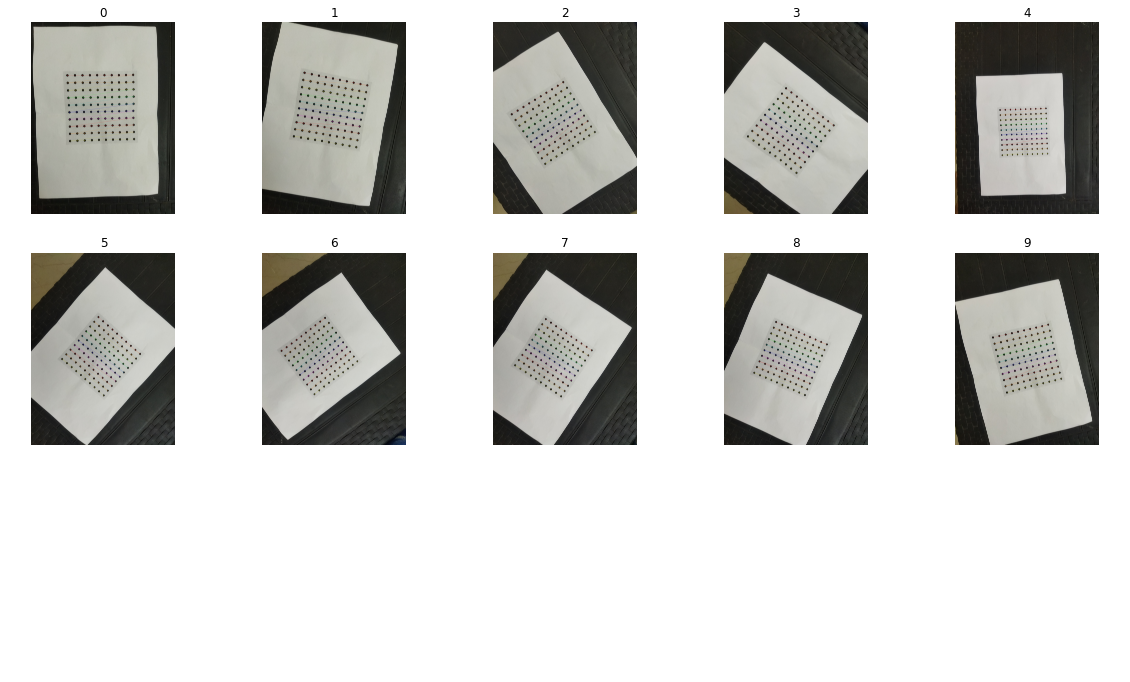

In [8]:
plt.rcParams['figure.figsize'] = (20, 12)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Reading images
images=[f'pattern_{i}.jpg' for i in range(1,11)]

# Defining termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Counter for images where corners were detected
found = 0

fig, ax = plt.subplots(3,5)
for i in ax.flatten():
    i.axis('off')

for i, f in enumerate(images):
    img = cv2.imread(f) # Capture frame by frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detecting blobs
    keypoints = blobDetector.detect(img)
    # Draw detected blobs as red circles
    im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0),
                                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    im_with_keypoints_gray = cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2GRAY)
    
    
    # Find the chess board corners
    ret, corners = cv2.findCirclesGrid(im_with_keypoints_gray, (10,10), None,
                                      blobDetector = blobDetector)
    
    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(im_with_keypoints_gray, corners,
                                    (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (10,10), corners2, ret)
        ax[i//5,i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        #ax[i//5,i%5].imshow(img, interpolation='nearest')
        ax[i//5,i%5].set_title(i)

        found+=1

print('Number of images retained during blob detection: ',found)